In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:
import seaborn as sns

In [ ]:
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])

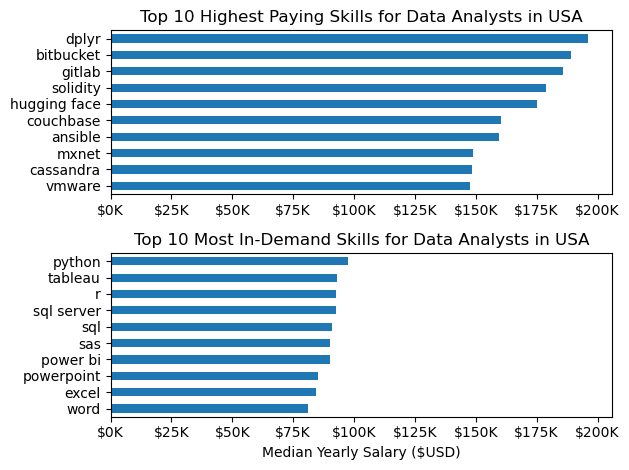

In [ ]:
df_DA_USA = df_DA_USA.explode('job_skills')
df_DA_USA_group = df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_USA_top_pay = df_DA_USA_group.sort_values(by='median', ascending=False).head(10)

df_DA_USA_top_skills = df_DA_USA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)
df_DA_USA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paying Skills for Data Analysts in USA")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_USA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts in USA")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()

C:\Users\Riflo\AppData\Local\Temp\ipykernel_55224\53940715.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_USA_top_skills,x='median', y=df_DA_USA_top_skills.index, ax=ax[1], legend = False, palette="light:b_r")


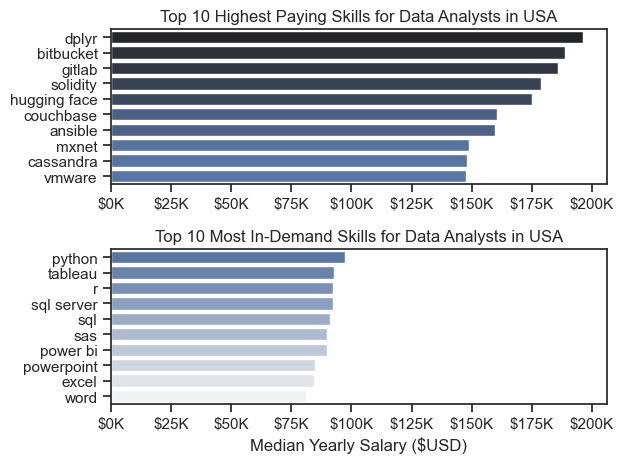

In [ ]:
df_DA_USA = df_DA_USA.explode('job_skills')
df_DA_USA_group = df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_USA_top_pay = df_DA_USA_group.sort_values(by='median', ascending=False).head(10)

df_DA_USA_top_skills = df_DA_USA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")
sns.barplot(data=df_DA_USA_top_pay,x='median', y=df_DA_USA_top_pay.index, ax=ax[0], hue = 'median', legend = False, palette="dark:b_r")
# df_DA_USA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paying Skills for Data Analysts in USA")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_USA_top_skills,x='median', y=df_DA_USA_top_skills.index, ax=ax[1], legend = False, palette="light:b_r")
# df_DA_USA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts in USA")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()

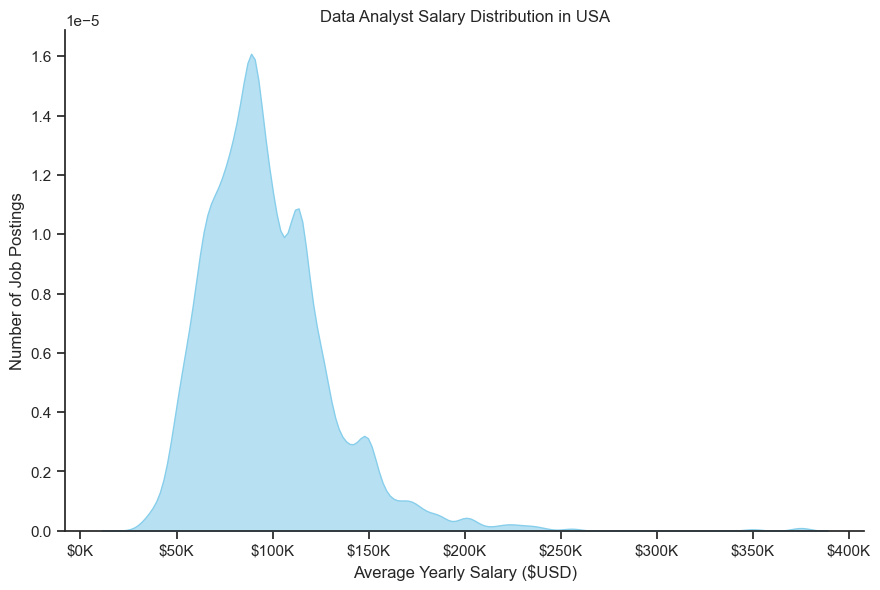

In [ ]:
sns.displot(df_DA_USA['salary_year_avg'], kind ='kde', fill=True, height=6, aspect=1.5, color="skyblue", alpha=0.6)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Data Analyst Salary Distribution in USA")
plt.xlabel("Average Yearly Salary ($USD)")
plt.ylabel("Number of Job Postings")
plt.show()

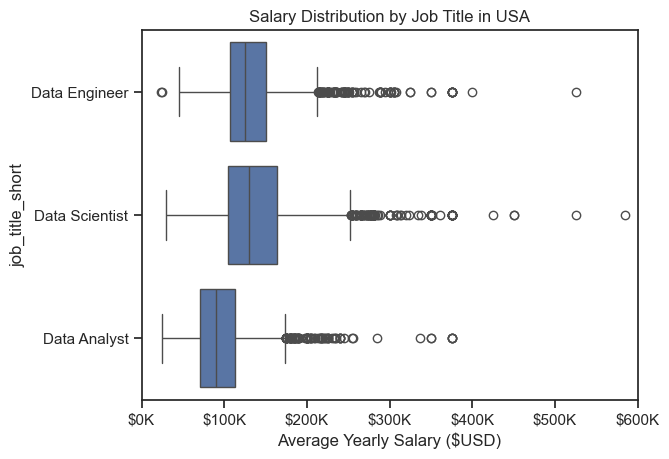

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()
df_DA_USA = df_USA.dropna(subset=['salary_year_avg'])

job_list = [df_DA_USA[df_DA_USA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
sns.boxplot(data=df_DA_USA, x='salary_year_avg', y= 'job_title_short')

plt.title("Salary Distribution by Job Title in USA")
plt.xlabel("Average Yearly Salary ($USD)")
ax = plt.gca()
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.xlim(0, 600000)
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()